# Adult Income: Crafting a Story

## Introduction

In a world shaped by diverse opportunities and challenges, understanding income disparities is crucial to addressing economic inequality.In this notebook, we will tell a compelling story about a Adult Income dataset. This dataset, which includes demographic information such as race, education, and occupation, allows us to craft a compelling narrative that explores the interplay between individual circumstances and financial outcomes. By weaving together the lives of diverse characters represented in the data, we can illuminate the challenges and triumphs faced by adults in their pursuit of economic stability. As we embark on this storytelling journey, we aim to not only analyze trends but also to humanize the statistics, revealing the broader societal implications of income inequality and opportunity.

## Import libraries

In [30]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn import metrics

def printmd(string):
    display(Markdown(string))  
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize


## Load Data

In [31]:
adult = pd.read_csv('adult.csv')

In [32]:
adult.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [33]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


## Statistics Overview

In [34]:
adult.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


## Missing values

In [35]:
for i,j in zip(adult.columns,(adult.values.astype(str) == '?').sum(axis = 0)):
    if j > 0:
        print(str(i) + ': ' + str(j) + ' records')

workclass: 2799 records
occupation: 2809 records
native-country: 857 records


**Can I find trends in the data?** 

## Exploratory Analysis

### <u>Education vs Income

As we delve into the data, we notice significant trends that reveal the impact of education on income. Higher educational attainment often correlates with increased earnings, with individuals holding master’s degrees or higher frequently surpassing the \\$50,000 annual income mark. This pattern underscores the importance of education as a pathway to financial stability and growth.

In [8]:
# Creating a dictionary that contain the education and it's corresponding education level
edu_level = {}
for x,y in adult[['educational-num','education']].drop_duplicates().itertuples(index=False):
    edu_level[y] = x

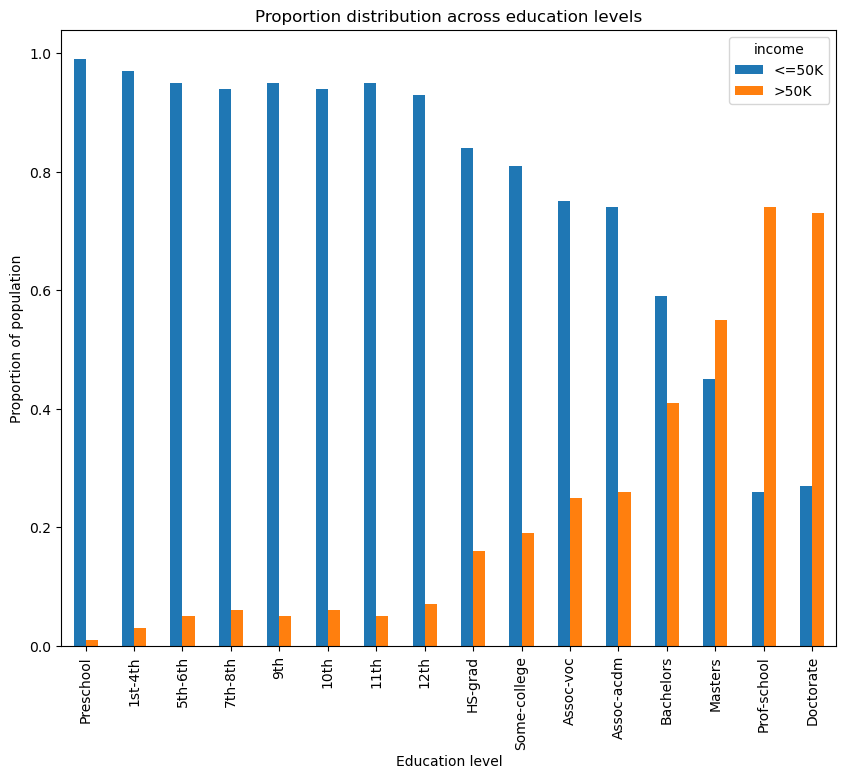

In [38]:
# Create a cross-tabulation and calculate proportions
education = round(pd.crosstab(adult.education, adult.income).div(pd.crosstab(adult.education, adult.income).apply(sum,1),0),2)

# Reindex to ensure the education levels are in the desired order
education = education.reindex(sorted(edu_level, key=edu_level.get, reverse=False))

# Plotting the data
ax = education.plot(kind ='bar', title = 'Proportion distribution across education levels', figsize = (10,8))
ax.set_xlabel('Education level')
ax.set_ylabel('Proportion of population')

plt.show()

In the figure above, we present a bar graph illustrating the proportion of income classes across different education levels. As anticipated, the graph shows that as education levels increase, the proportion of individuals earning over \\$50,000 annually also rises. Notably, it is only after obtaining a master’s degree that the majority of people earn more than \\$50,000 a year.

### Gender vs Income

Gender disparities also emerge prominently in our analysis. The data indicates that men tend to earn more than women across nearly all occupations and education levels. This persistent wage gap raises critical questions about equality in the workplace and the societal norms that contribute to these differences. Interestingly, in specific categories, such as the "without-pay" workclass, both genders show equal proportions, suggesting that traditional employment models may not fully capture the complexities of gender roles in society.

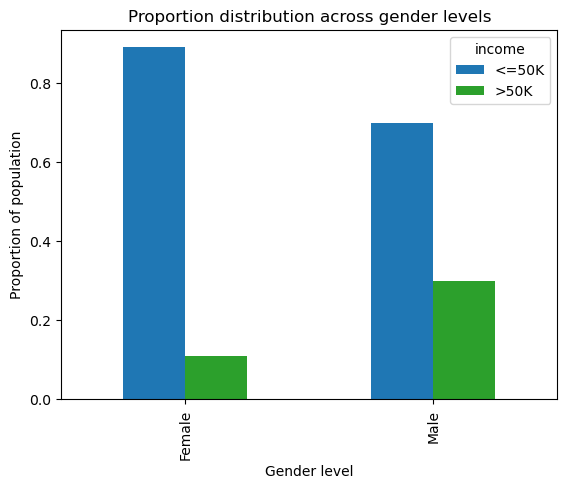

In [39]:
# Proportion distribution across gender levels

# Create a cross-tabulation and calculate proportions
gender = round(pd.crosstab(adult.gender, adult.income).div(pd.crosstab(adult.gender, adult.income).apply(sum,1),0),2)

# Sort by the proportion of people earning more than 50K
gender.sort_values(by = '>50K', inplace = True)

# Plotting the data
ax = gender.plot(kind ='bar', title = 'Proportion distribution across gender levels', color=['#1f77b4', '#2ca02c'])
ax.set_xlabel('Gender level')
ax.set_ylabel('Proportion of population')

plt.show()

In the figure above, we present a bar graph illustrating the distribution of income classes across genders. The graph reveals an evident wage gap between females and males. Although we lack the exact income values, we can observe that the proportion of males earning over \$50,000 annually is more than double that of their female counterparts.

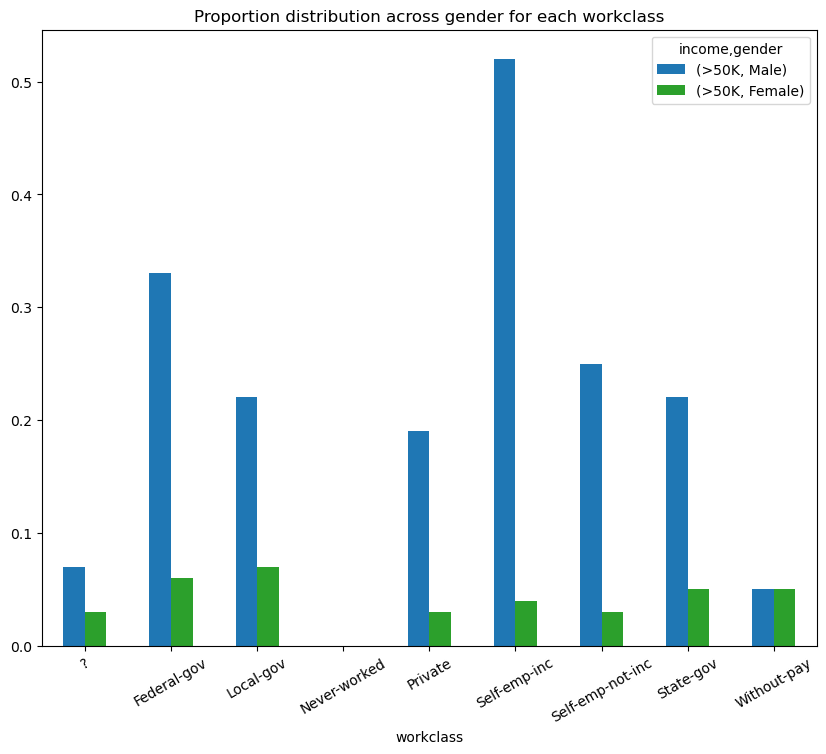

In [40]:
# Proportion distribution across gender for each workclass

# Create a cross-tabulation and calculate proportions
gender_workclass = round(pd.crosstab(adult.workclass, [adult.income, adult.gender]).div(pd.crosstab(adult.workclass, [adult.income, adult.gender]).apply(sum,1),0),2)

# Plotting the data for >50K by gender
gender_workclass[[('>50K','Male'), ('>50K','Female')]].plot(kind = 'bar', title = 'Proportion distribution across gender for each workclass', color=['#1f77b4', '#2ca02c'], figsize = (10,8), rot = 30)
ax.set_xlabel('Gender level')
ax.set_ylabel('Proportion of population')

plt.show()

Examining the income disparity between men and women, we plotted the proportion of individuals in both groups earning over 50,000 per year across all working classes, as illustrated in figure above. The data shows that men consistently have a higher proportion earning more than 50,000 annually compared to women, with the exception of the "without.pay" working class, where the proportions are equal.

### Occupation vs Income

Occupation plays a vital role in shaping income as well. The analysis reveals that certain professions, particularly in management and technology, consistently offer higher salaries compared to roles in service and manual labor. The geographical aspect also adds another layer of complexity; individuals from certain regions, particularly in Europe and North America, show a higher likelihood of earning more than $50,000 compared to those from South America and some parts of Asia.

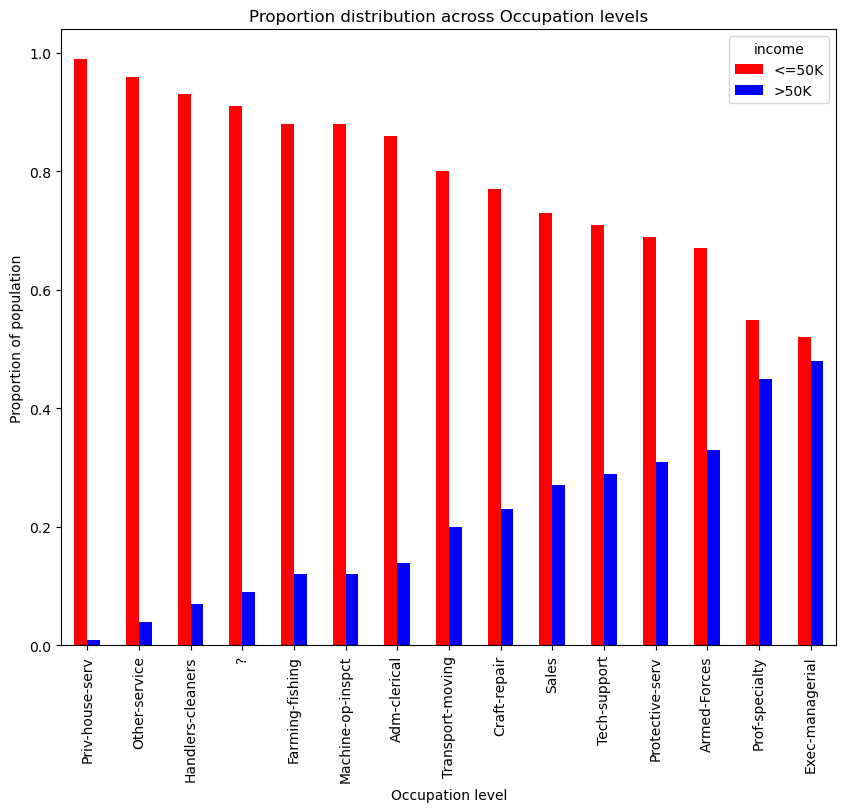

In [41]:
# Proportion distribution across Occupation levels

# Create a cross-tabulation and calculate proportions
occupation = round(pd.crosstab(adult.occupation, adult.income).div(pd.crosstab(adult.occupation, adult.income).apply(sum,1),0),2)

# Sort by the proportion of people earning more than 50K
occupation.sort_values(by = '>50K', inplace = True)

# Plotting the data
ax = occupation.plot(kind ='bar', title = 'Proportion distribution across Occupation levels', color= ['red', 'blue'], figsize = (10,8))
ax.set_xlabel('Occupation level')
ax.set_ylabel('Proportion of population')

plt.show()

In the figure above, relationship between occupation and income levels reveals significant disparities within the workforce, as illustrated by the data from the adult dataset. Analyzing the proportions of individuals earning more than 50,000 across various occupations highlights that certain professions consistently yield higher incomes. For instance, jobs in management, professional, and technical fields often show a greater percentage of individuals surpassing the 50,000 threshold. In contrast, occupations in service and labor-intensive sectors tend to have lower proportions of high earners.

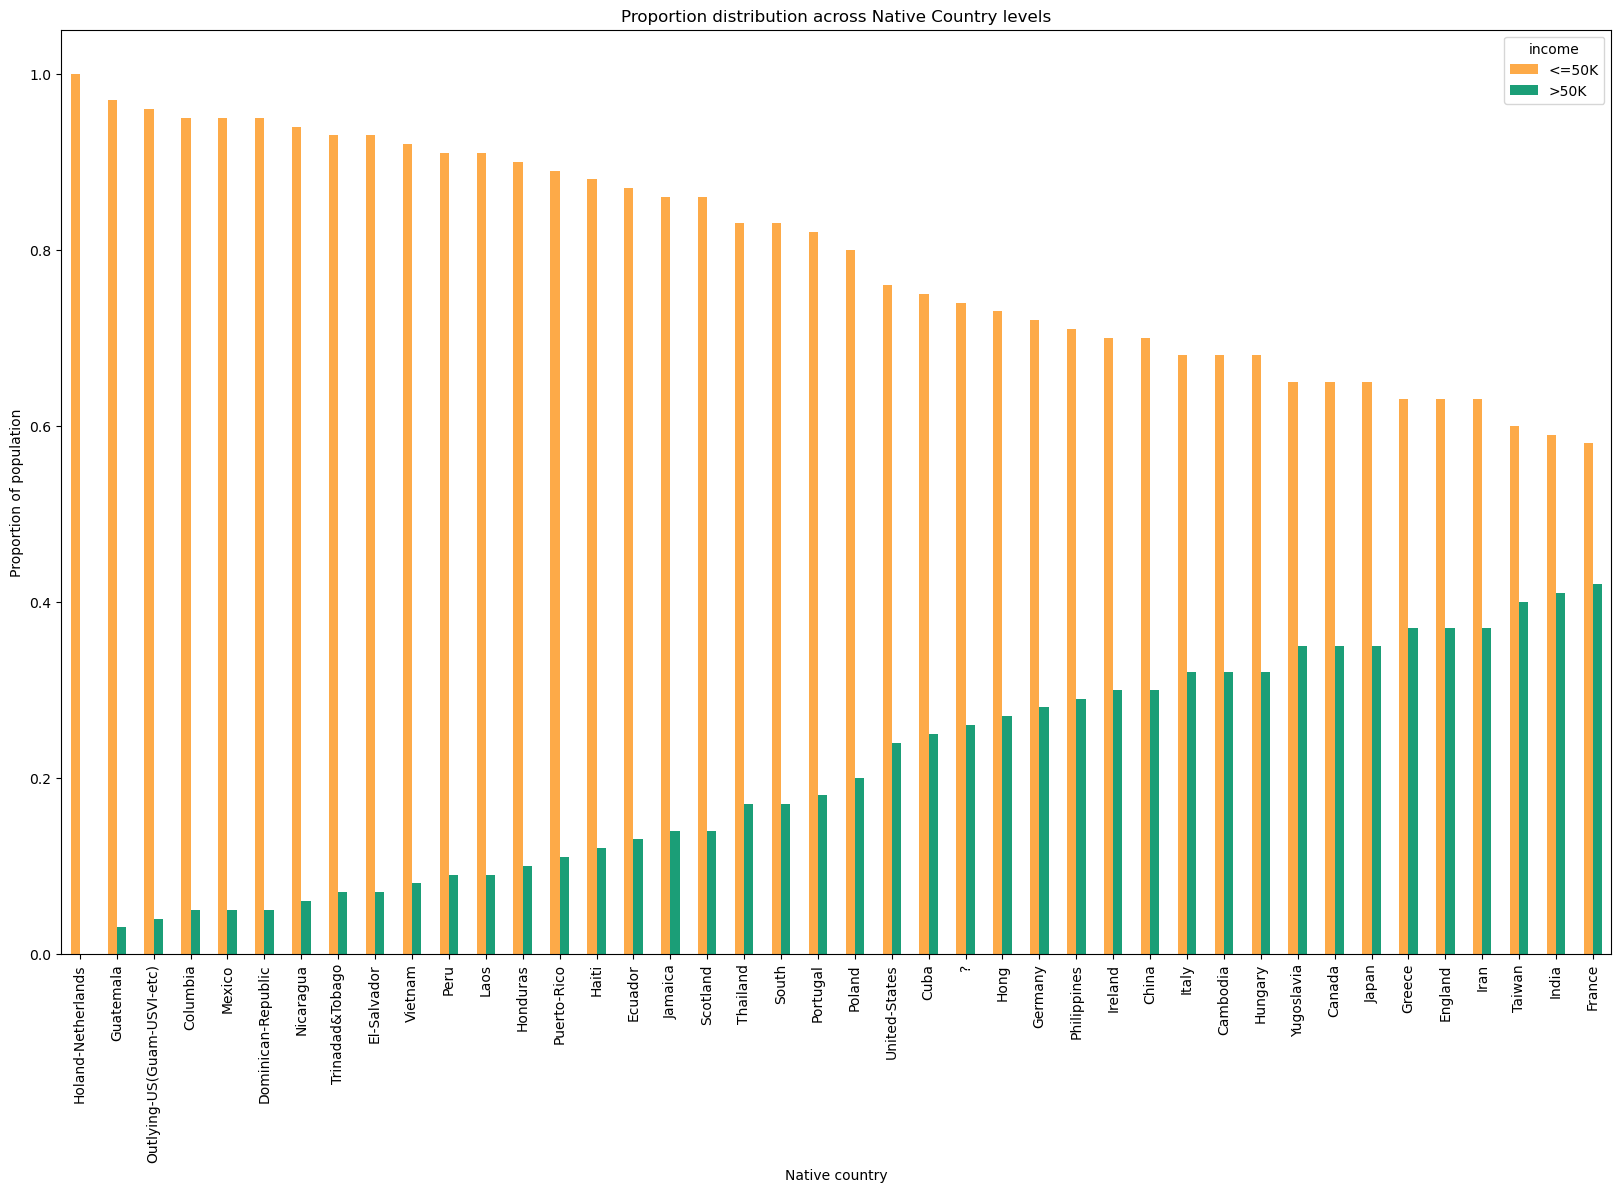

In [13]:
# Proportion distribution across Native Country levels

# Create a cross-tabulation and calculate proportions
native_country = round(pd.crosstab(adult['native-country'], adult.income).div(pd.crosstab(adult['native-country'], adult.income).apply(sum,1),0),2)

# Sort by the proportion of people earning more than 50K
native_country.sort_values(by = '>50K', inplace = True)

# Plotting the data
ax = native_country.plot(kind ='bar', title = 'Proportion distribution across Native Country levels', color=['#fdaa48','#1b9e77'], figsize = (20,12))
ax.set_xlabel('Native country')
ax.set_ylabel('Proportion of population')

plt.show()

We created a bar graph that illustrates the proportion of income classes by native country, as shown in the figure above. The graph reveals a clear trend in the positioning of the countries. South American countries are situated on the left side of the plot, reflecting a low proportion of the population earning over 50,000 annually. The United States is positioned more centrally, while countries from Europe and Asia are found on the right, indicating a higher proportion of individuals earning more than 50,000 per year.

## Conclusion

As we explore these dimensions, the narrative of adult income unfolds, highlighting the interplay between education, gender, occupation, and geography. It serves as a reminder of the ongoing journey toward economic equity and the policies needed to foster a more inclusive environment where every individual has the opportunity to thrive.

Through this lens, the Adult Income dataset not only provides statistics but also tells a deeper story about societal structures, aspirations, and the paths that lead to financial success. As we reflect on these insights, it becomes clear that addressing income inequality requires a multifaceted approach, one that embraces education, advocates for fair wages, and recognizes the diverse backgrounds that shape our workforce.